In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import json 
import re 
import pickle
import os 
from scipy.stats import spearmanr
import pandas as pd

In [2]:
#protein_list = os.listdir('sameMSA_contactmap_new')
protein_list = os.listdir('/ssd/zhidian/sameMSA_jac/jac_contact') 

In [3]:
protein_list

['4RY0A',
 '3H7AA',
 '1TKEA',
 '1FCYA',
 '1KQFC',
 '4COGA',
 '4XOMA',
 '1RKUA',
 '1BRTA',
 '1TQHA']

In [4]:
info = {}

for protein in protein_list: 
    print(protein) 
    info[protein] = {}
    
     # load target contact 
    with open('/ssd/zhidian/jac_contact/esm2_jac_contact/' + protein + '_esm2_jac_contact.pkl', 'rb') as file:
        ref_contact = pickle.load(file)
        
    with open('/ssd/zhidian/jac/esm2_jac/' + protein + '_esm2_jac.pkl', 'rb') as file:
        ref_jac = pickle.load(file)
        
    #for bin_index in range(1,9):
    for bin_index in range(1, 9):
        bin_index = str(bin_index) 
        info[protein][bin_index] = {}

        for seq_index in range(3):
            
            # load query contact 
            query_contact = np.load('/ssd/zhidian/sameMSA_jac/jac_contact/' + protein + '/' + bin_index + '_' + str(seq_index) + '.npy') 
            query_jac = np.load('/ssd/zhidian/sameMSA_jac/jac/' + protein + '/' + bin_index + '_' + str(seq_index) + '.npy') 
            
            
            # load seq 
            seq_path = 'sameMSA_sampled_new/' + protein + '.json' 
            f = open(seq_path)
            seq_dict = json.load(f) 
            seq = seq_dict[bin_index][seq_index]
            print('bin ' + str(bin_index))
            
            # prepare indices for filtering 
            seq_ab = re.sub(r'[^a-zA-Z]', '', seq)
            seq_nolower = re.sub(r'[a-z]', '', seq)
            
            # filter the query seq contact 
            uppercase_indices = [i for i, char in enumerate(seq_ab) if char.isupper()]
            filtered_query_contact = query_contact[np.ix_(uppercase_indices, uppercase_indices)]
            print('filtered_query_contact', filtered_query_contact.shape) 
            
            # filter the target seq contact 
            nolower_indices = [i for i, char in enumerate(seq_nolower) if char.isupper()]
            filtered_ref_contact = ref_contact[np.ix_(nolower_indices, nolower_indices)]
            print('filtered_ref_contact', filtered_ref_contact.shape) 
            
            
            # filter the query seq and ref jac
            filtered_query_jac = query_jac[np.ix_(uppercase_indices, range(20), uppercase_indices, range(20))]
            filtered_ref_jac = ref_jac[np.ix_(nolower_indices, range(20), nolower_indices, range(20))]
            print('filtered_query_jac', filtered_query_jac.shape) 
            print('filtered_ref_jac', filtered_ref_jac.shape) 
            
            L = filtered_query_contact.shape[0]
            
            
            idx = np.triu_indices(L, 1)
            a = filtered_query_jac[idx[0], :, idx[1], :]
            b = filtered_ref_jac[idx[0], :, idx[1], :]
            
            ORDER = filtered_ref_contact[idx[0], idx[1]].argsort()[::-1]
            cutoff = L
            b_std = np.sqrt(np.square(b[ORDER[:cutoff]]).mean())
            mask = np.abs(b[ORDER[:cutoff]]) > b_std 
            
            info[protein][bin_index][seq_index] = spearmanr(a[ORDER[:cutoff]][mask].flatten(), b[ORDER[:cutoff]][mask].flatten()).statistic

4RY0A
bin 1
filtered_query_contact (251, 251)
filtered_ref_contact (251, 251)
filtered_query_jac (251, 20, 251, 20)
filtered_ref_jac (251, 20, 251, 20)
bin 1
filtered_query_contact (274, 274)
filtered_ref_contact (274, 274)
filtered_query_jac (274, 20, 274, 20)
filtered_ref_jac (274, 20, 274, 20)
bin 1
filtered_query_contact (253, 253)
filtered_ref_contact (253, 253)
filtered_query_jac (253, 20, 253, 20)
filtered_ref_jac (253, 20, 253, 20)
bin 2
filtered_query_contact (276, 276)
filtered_ref_contact (276, 276)
filtered_query_jac (276, 20, 276, 20)
filtered_ref_jac (276, 20, 276, 20)
bin 2
filtered_query_contact (270, 270)
filtered_ref_contact (270, 270)
filtered_query_jac (270, 20, 270, 20)
filtered_ref_jac (270, 20, 270, 20)
bin 2
filtered_query_contact (264, 264)
filtered_ref_contact (264, 264)
filtered_query_jac (264, 20, 264, 20)
filtered_ref_jac (264, 20, 264, 20)
bin 3
filtered_query_contact (245, 245)
filtered_ref_contact (245, 245)
filtered_query_jac (245, 20, 245, 20)
filtered

In [5]:
info

{'4RY0A': {'1': {0: 0.5450815428148805,
   1: 0.54279716031949,
   2: 0.4485695425618677},
  '2': {0: 0.5877458339799035, 1: 0.5941317102870365, 2: 0.48444473882267486},
  '3': {0: 0.721498504376819, 1: 0.7218126315035592, 2: 0.7331738604674718},
  '4': {0: 0.8151385026533072, 1: 0.8110949144582629, 2: 0.8063386428527459},
  '5': {0: 0.8044489561677639, 1: 0.8322307240715658, 2: 0.8188423249723172},
  '6': {0: 0.8509250146960453, 1: 0.8486262163975539, 2: 0.897893294468785},
  '7': {0: 0.8966441582431949, 1: 0.9116423479461488, 2: 0.9053904073227464},
  '8': {0: 0.9075604779059181, 1: 0.9390268070606349, 2: 0.8461042286169876}},
 '3H7AA': {'1': {0: 0.5876628038542961,
   1: 0.5771654031130137,
   2: 0.5375737566144714},
  '2': {0: 0.6848708031888986, 1: 0.5993030188064151, 2: 0.5889341637748852},
  '3': {0: 0.7469355791242448, 1: 0.7484804559740525, 2: 0.686952768128669},
  '4': {0: 0.7865711677732496, 1: 0.8090795244314433, 2: 0.8093876659971173},
  '5': {0: 0.8291919088622535, 1: 0.8

['1', '2', '3', '4', '5', '6', '7', '8']


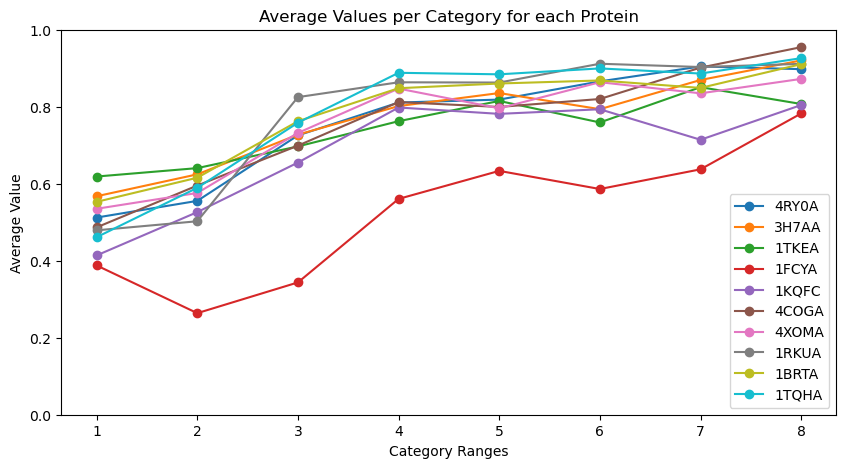

In [6]:
plt.figure(figsize=(10, 5))

# Process each protein
for protein, categories in info.items():
    averages = []
    for category, values in categories.items():
        # Calculate average of values
        avg = sum(values.values()) / len(values)
        averages.append(avg)
    # Plotting
    plt.plot(list(categories.keys()), averages, label=protein, marker='o')

    
print(list(categories.keys()))
# Add labels and title
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.xlabel('Category Ranges')
plt.ylim(0, 1)
plt.title('Average Values per Category for each Protein')
plt.legend()
plt.savefig('../figures_manuscript/revision/corr/jac_correlation_sameMSA_seq.svg')
# Show plot
plt.show()